<p align="center">
  <img src = "Images/heart_failure.png" width="1500">
</p>

# Heart Matters - Heart Failure Prediction

<hr style="border: 2px solid black;">

Heart Failure, also known as congestive heart failure, is a debilitating condition that affects millions of individuals worldwide. It is characterized by the inability of the heart to pump enough blood to meet the body's needs for oxygen and nutrients. This can lead to a range of symptoms such as fatigue, shortness of breath, and edema. It is a progressive condition that requires ongoing medical management and can greatly impact an individual's quality of life.

**Business Problem:**
Heart failure poses a significant financial burden on healthcare systems, as well as a tremendous toll on patients and their families. Despite advances in medical treatments, the rate of hospitalization and readmission for heart failure remains alarmingly high. The cost of healthcare for heart failure patients continues to rise, making it imperative to find ways to improve the early detection and management of this condition.

**Project Objective:**
The objective of this project is to build a predictive model to accurately identify individuals at risk of heart failure. By leveraging the power of machine learning and XAI techniques, this project aims to improve the early detection and management of heart failure, reducing the incidence of hospitalization and readmission, and ultimately improving the lives of those affected by this condition.

**Dataset:**
The dataset used in this project was obtained from Kaggle (https://www.kaggle.com/code/sourabhpatil2628/prediction-on-heart-diesease/data). This dataset contains a variety of demographic, lifestyle, and medical information on patients with heart failure, providing a rich source of data for building a predictive model. The use of this dataset is for educational purposes only and will provide a valuable opportunity for increasing my machine learning and XAI skills.

In [1]:
!ls

Data                           Images
Heart_Failure_Prediction.ipynb README.md


## Data Inspection

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import shap

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('Data/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.value_counts().sum()

918

<AxesSubplot: xlabel='HeartDisease', ylabel='count'>

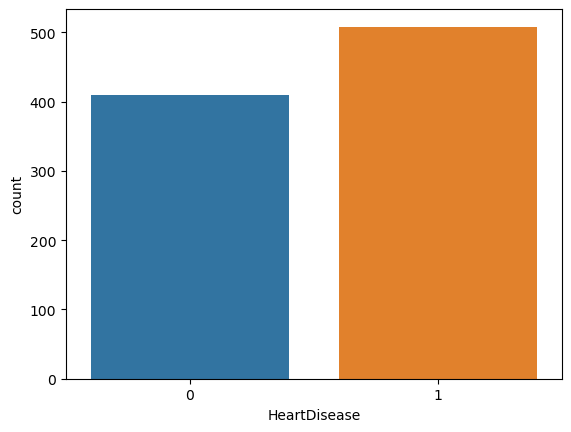

In [8]:
# Checking if my dataset is balanced
sns.countplot(x = df['HeartDisease'], data = df)

Based on the bar chart that we generated, we can observe that there is a difference of around 100 between the instances of patients with heart disease (represented by the label "1") and the instances of patients without heart disease (represented by the label "0"). Specifically, the number of patients with heart disease is around 500 while the number of patients without heart disease is around 400. This difference between the two classes indicates that the dataset is not perfectly balanced and may impact the accuracy of our model if we don't handle the class imbalance properly. However, it's still considered relatively balanced compared to some other datasets that can have a large class imbalance. In order to ensure the best performance of our model, we should consider using techniques such as oversampling, undersampling, or combination of both, to balance the dataset before training our model.

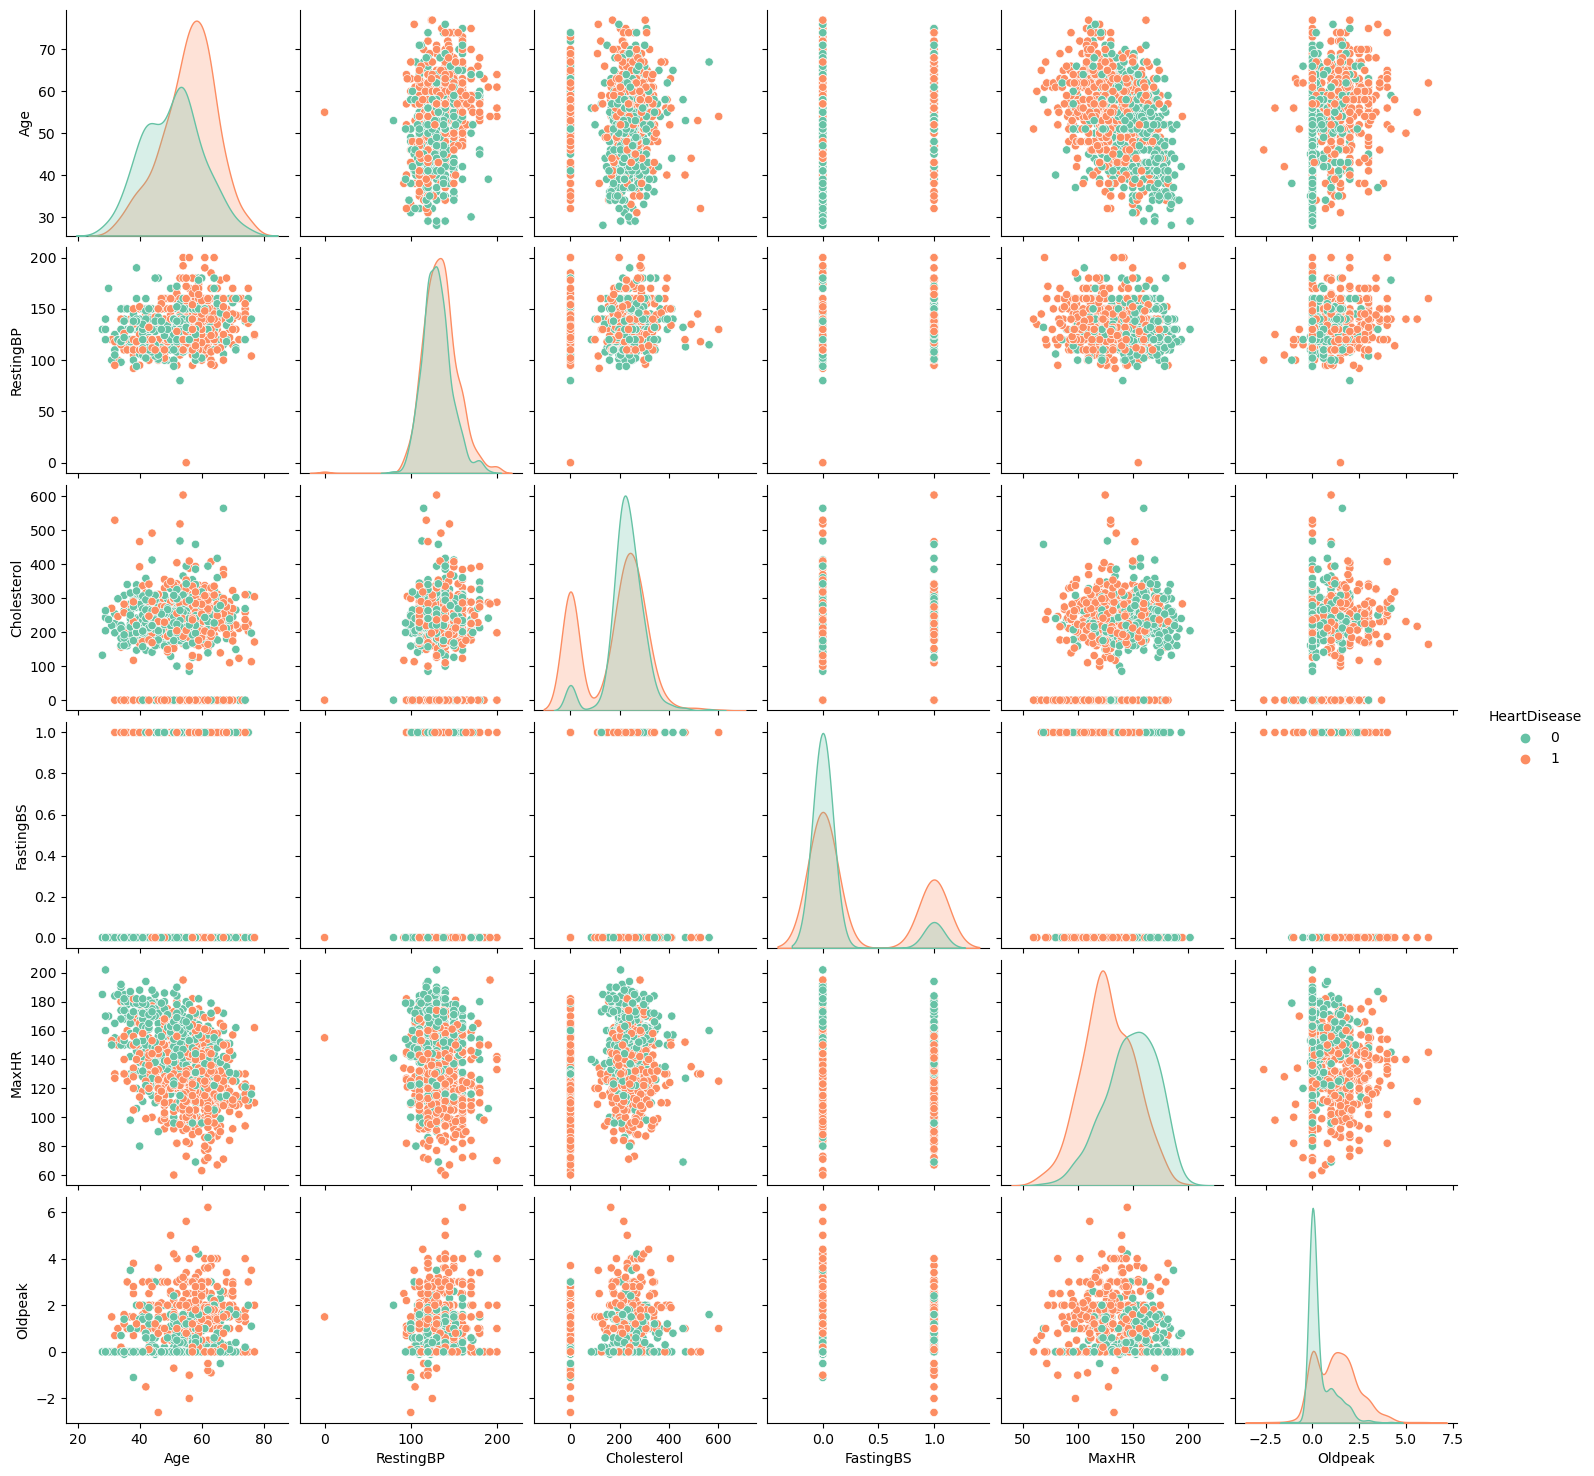

In [9]:
sns.pairplot(df, hue='HeartDisease', palette = 'Set2')

In the pairplot, we can observe that individuals with heart disease tend to have an average age of around 48 years and above. This information can be deduced by looking at the distribution of the data points in the scatter plot of "Age" and "Target". We can see that the data points with the target value of 1 (indicating heart disease) are concentrated on the right side of the plot, representing higher ages compared to the data points with the target value of 0.

## Exploratory Data Analysis

In [10]:
df.corr()

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


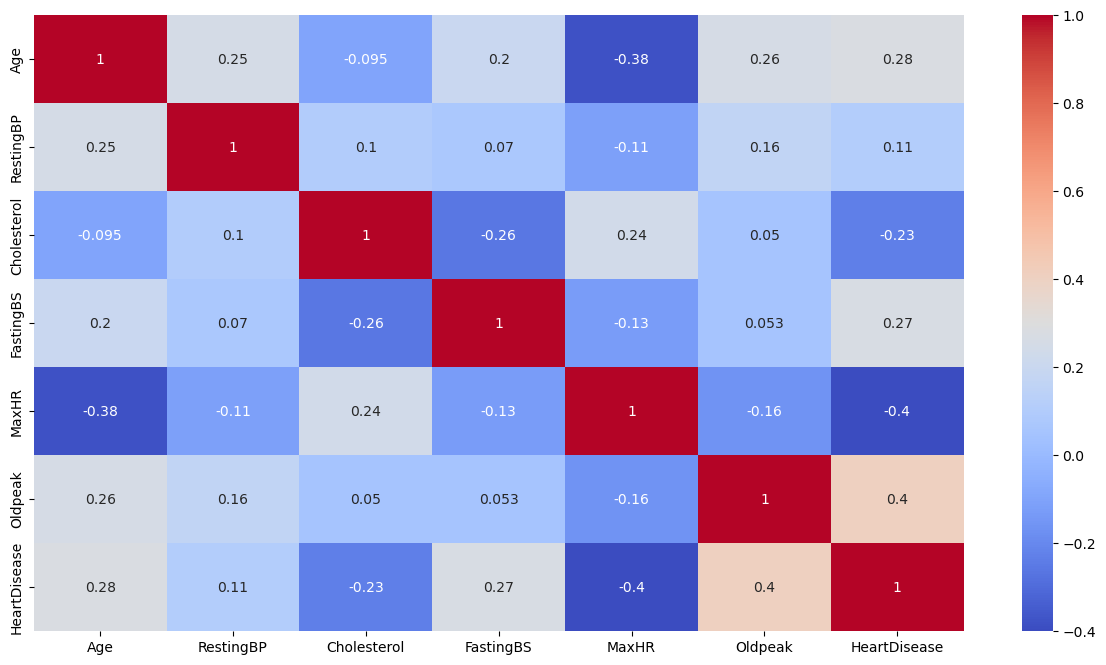

In [11]:
# Plot the correlation graph between variables
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)
plt.show()

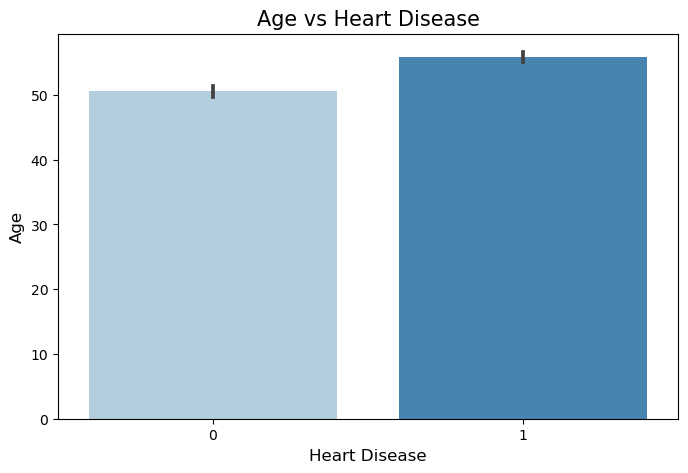

In [12]:
plt.figure(figsize = (8, 5))
sns.barplot(x = "HeartDisease", y = "Age", data = df, palette = "Blues")
plt.title("Age vs Heart Disease", fontsize = 15)
plt.xlabel("Heart Disease", fontsize=12)
plt.ylabel("Age", fontsize = 12)
plt.show()

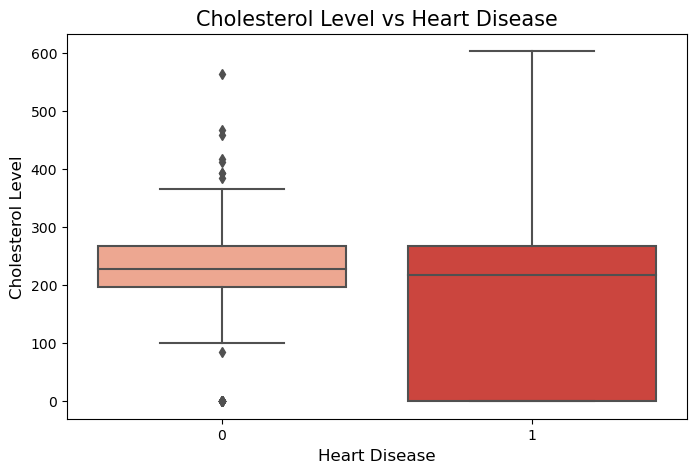

In [13]:
plt.figure(figsize =(8, 5))
sns.boxplot(x = "HeartDisease", y="Cholesterol", data = df, palette = "Reds")
plt.title("Cholesterol Level vs Heart Disease", fontsize=15)
plt.xlabel("Heart Disease", fontsize = 12)
plt.ylabel("Cholesterol Level", fontsize = 12)
plt.show()

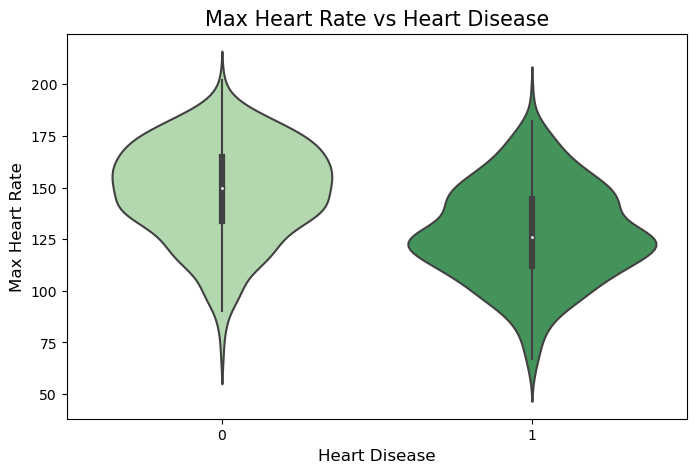

In [14]:
plt.figure(figsize = (8,5))
sns.violinplot(x = "HeartDisease", y = "MaxHR", data = df, palette = "Greens")
plt.title("Max Heart Rate vs Heart Disease", fontsize = 15)
plt.xlabel("Heart Disease", fontsize = 12)
plt.ylabel("Max Heart Rate", fontsize = 12)
plt.show()

Passing `palette` without assigning `hue` is deprecated.
46.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
53.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
34.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


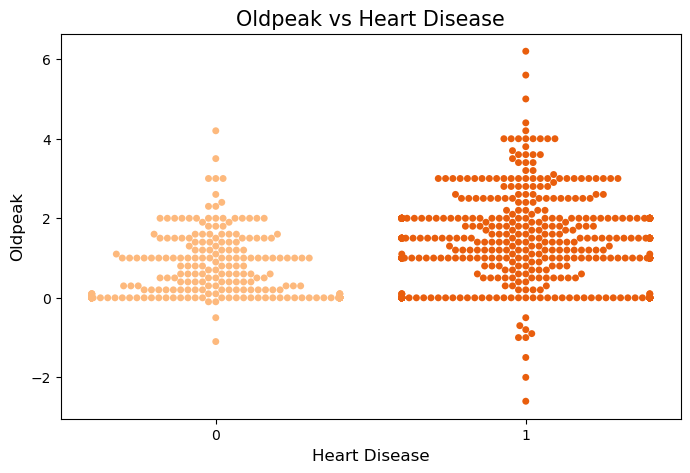

In [15]:
plt.figure(figsize = (8,5))
sns.swarmplot(x = "HeartDisease", y = "Oldpeak", data = df, palette = "Oranges")
plt.title("Oldpeak vs Heart Disease", fontsize = 15)
plt.xlabel("Heart Disease", fontsize = 12)
plt.ylabel("Oldpeak", fontsize = 12)
plt.show()

Oldpeak is a continuous variable that refers to the ST depression induced by exercise relative to rest. It is a measure of the amount of blood that is not flowing properly to the heart muscle during exercise. The scatter plot shows that for those with heart disease, oldpeak values start at around -3 and go up to 6, while for those without heart disease, oldpeak values start at around -1 and end at 4. This information is important as it highlights the correlation between oldpeak values and the presence of heart disease, with higher oldpeak values potentially indicating a greater risk for heart disease.

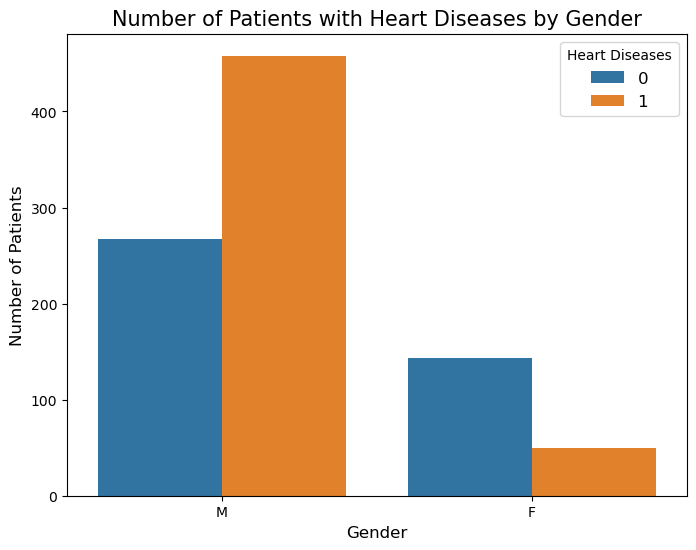

In [16]:
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Sex', hue='HeartDisease', data = df)
plt.title("Number of Patients with Heart Diseases by Gender", fontsize = 15)
plt.xlabel("Gender", fontsize = 12)
plt.ylabel("Number of Patients", fontsize = 12)
plt.legend(title='Heart Diseases', fontsize = 12)
plt.show()

Based on the barplots above, the number of males (represented by the 'M' category) diagnosed with heart disease is above 400, while the number of males without heart disease is above 200. On the other hand, the number of females (represented by the 'F' category) diagnosed with heart disease is above 100, while the number of females without heart disease is less than 70. These results show a higher prevalence of heart disease among males compared to females, and can provide insights into the relationship between gender and heart disease.

## Random Forest Classifier - Model Building

In [17]:
# Extracting features and target columns
X = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

The data is split into training and testing sets with a test size of 20% and a random state of 42 to ensure that the same randomly selected data is used every time the code is run and to train the model on 80% of the data and evaluate its performance on the remaining 20%.

In [18]:
# One-hot encode the categorical variables
encoder = OneHotEncoder(handle_unknown = 'ignore')
X = encoder.fit_transform(X)

In [19]:
# Train-Test Split my dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
# Scaling the features using Standard Scaler
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

This line of code applies scaling to the training set using the fit_transform method. This method computes the mean and standard deviation of the data and applies scaling using those values. Then, it transforms the training data into a normalized form. The next line of code applies the same scaling to the testing set using the transform method. This ensures that the same normalization is applied to both the training and testing sets, allowing for a fair comparison between the performance of the model on both sets.

In [21]:
# Building our model using Random Forest Classifier
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Fitting the model on X_train and y_train
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Making a prediction on the testing dataset
y_pred = model.predict(X_test)

## Random Forest Classifier - Model Evaluation

In [23]:
# Getting the accuracy score of our model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model: {:.2f}%".format(accuracy * 100))

Accuracy of the model: 86.41%


In [24]:
# Calculate precision, recall, f1-score, and support
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1 Score: {:.2f}%".format(f1_score*100))
print("Support: ", support)

Precision: 89.42%
Recall: 86.92%
F1 Score: 88.15%
Support:  None


The above results show the performance of the model in terms of different evaluation metrics.

- Accuracy: 86% which means that 86% of the time, the model made correct predictions.
- Precision: 89.42%, it represents the percentage of the predictions made by the model that were actually correct among all the positive predictions made by the model.
- Recall: 86.92% which means the percentage of actual positive cases that were correctly identified by the model.
- F1 Score: 88.15% which is the harmonic mean of Precision and Recall, providing a single score to balance both metrics.

<function matplotlib.pyplot.show(close=None, block=None)>

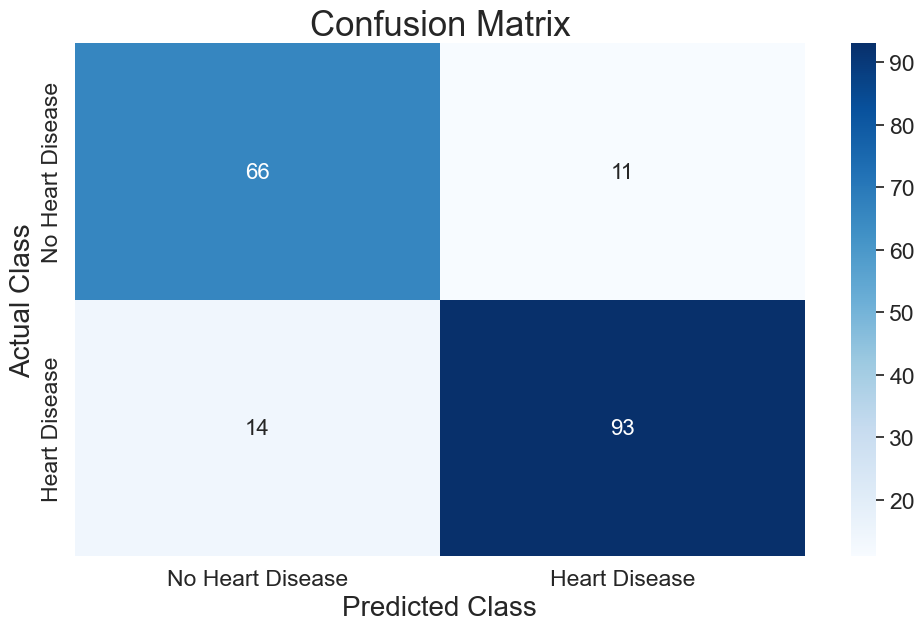

In [25]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 6))
sns.set(font_scale = 1.5)
sns.heatmap(cm, annot = True, annot_kws = {'size': 16}, cmap = 'Blues', fmt = 'd',
           xticklabels = ['No Heart Disease', 'Heart Disease'], yticklabels = ['No Heart Disease', 'Heart Disease'])
plt.tight_layout()
plt.title('Confusion Matrix', fontsize = 25)
plt.xlabel('Predicted Class', fontsize = 20)
plt.ylabel('Actual Class', fontsize = 20)
plt.show

The above confusion matrix shows the performance of the classifier in predicting the presence of heart disease in individuals. The upper left light blue value 66 represents the number of individuals correctly predicted to have no heart disease. The upper right very light blue value 11 represents the number of individuals incorrectly predicted to have heart disease. The lower left light blue value 14 represents the number of individuals incorrectly predicted to have no heart disease. Finally, the lower right dark blue value 93 represents the number of individuals correctly predicted to have heart disease.

## Support Vector Machine (SVM) - Model Building

SVM (Support Vector Machines) is a type of supervised learning algorithm that can be used for both regression and classification problems. The goal of SVM is to find a boundary that separates the data into classes in a way that maximizes the margin between the classes. This boundary is called the maximum margin hyperplane.

SVC (Support Vector Classification) is a specific implementation of SVM used for classification problems. It is used to find the boundary that separates the classes in the best possible way.

After using the Random Forest Classifier, we can use SVC to check if the performance of the model can be improved. SVC is a good choice for this task because it can handle high dimensional data and can handle non-linear decision boundaries. It is also a good option for binary classification problems like our Heart Failure Prediction project.

In [26]:
# Perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
svm_model = SVC(kernel = 'linear', probability = True, random_state = 42)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [28]:
# Predict the classes for the test data
y_pred = svm_model.predict(X_test)

## Support Vector Machine (SVM) - Model Evaluation

In [29]:
# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of SVM Model: {:.2f}'.format(accuracy * 100))

Accuracy of SVM Model: 83.15


In [30]:
# Calculate precision, recall, f1-score, and support
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average = 'binary')
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1 Score: {:.2f}%".format(f1_score*100))
print("Support: ", support)

Precision: 88.00%
Recall: 82.24%
F1 Score: 85.02%
Support:  None


As showing in our analysis above, the SVM model for our Heart Failure prediction project has an accuracy score of 83.15% and a precision score of 88.00%. This means that the model correctly predicts the occurrence of heart failure 83.15% of the time and 88.00% of the positive predictions made by the model are accurate.

The recall score for the SVM model is 82.24%, which means that 82.24% of the total positive cases were correctly detected by the model. The F1 Score, which is the harmonic mean of precision and recall, is 85.02% for the SVM model.

When compared to the metrics of the previous Random Forest Classifier model, we can see that the precision score for the Random Forest Classifier is higher at 89.42%, but the accuracy score is lower at 86.41%. The recall score for the Random Forest Classifier is 86.92% and the F1 Score is 88.15%.

From these results, we can conclude that the Random Forest Classifier performed slightly better than the SVM model in terms of precision, recall, and F1 Score. However, it's important to keep in mind that these results may vary based on the data used to train and test the models.

<function matplotlib.pyplot.show(close=None, block=None)>

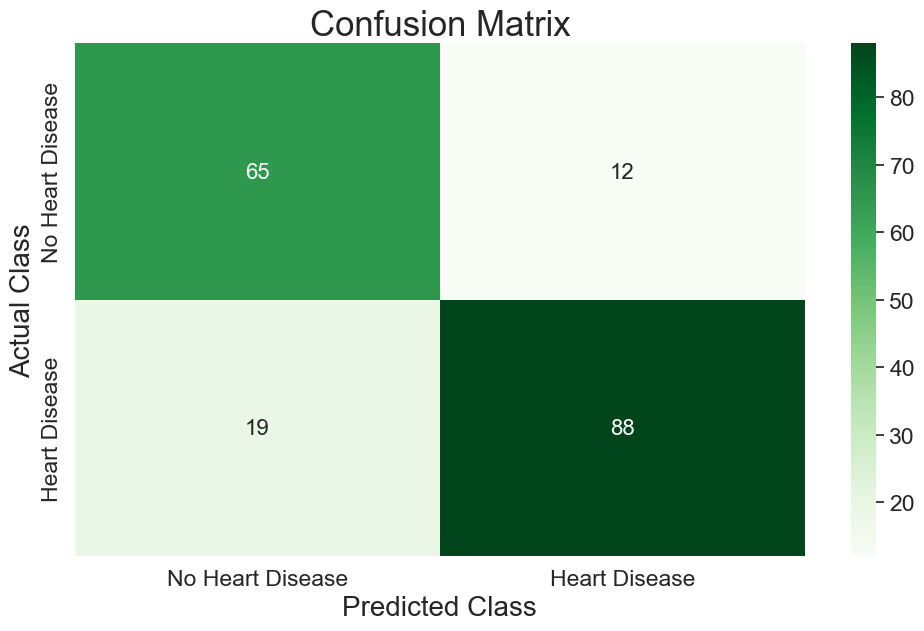

In [31]:
# Generate the confusion matrix
y_pred = svm_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize = (10, 6))
sns.set(font_scale = 1.5)
sns.heatmap(cm, annot = True, annot_kws = {'size': 16}, cmap = 'Greens', fmt = 'd',
           xticklabels = ['No Heart Disease', 'Heart Disease'], yticklabels = ['No Heart Disease', 'Heart Disease'])
plt.tight_layout()
plt.title('Confusion Matrix', fontsize = 25)
plt.xlabel('Predicted Class', fontsize = 20)
plt.ylabel('Actual Class', fontsize = 20)
plt.show

As showing in our confusion matrix above, the upper left corner (represented by the lime green color) shows a value of 65, which indicates the number of instances in the test set that were correctly classified as not having heart failure.

The upper right corner (represented by the very light green color) shows a value of 12, which represents the number of instances in the test set that were incorrectly classified as not having heart failure when in fact they did have heart failure.

The lower left corner (represented by the light green color) shows a value of 19, which indicates the number of instances in the test set that were incorrectly classified as having heart failure when in fact they did not have heart failure.

Finally, the lower right corner (represented by the dark green color) shows a value of 88, which represents the number of instances in the test set that were correctly classified as having heart failure.

Overall, the confusion matrix provides valuable information about the performance of our model in correctly classifying instances in the test set as either having or not having heart failure.

## Naive Bayes Classifier - Model Building

Naive Bayes is a probabilistic machine learning algorithm based on Bayes’ Theorem. It is called “naive” because it makes a strong assumption about the independence of the features. Naive Bayes has three main types: Gaussian Naive Bayes, Multinomial Naive Bayes, and Bernoulli Naive Bayes.

Why use Naive Bayes after SVM and Random Forest Classifier?

SVM and Random Forest Classifier are both effective algorithms for binary classification problems. However, they can be prone to overfitting and are computationally expensive. Naive Bayes, on the other hand, is a much faster algorithm that can provide quick results and is less prone to overfitting. Additionally, Naive Bayes is often used as a quick and easy method for obtaining a baseline performance on a binary classification problem.

Overall, while SVM and Random Forest Classifier are powerful algorithms, Naive Bayes can provide quick results and is a good option for obtaining a baseline performance. It is always good to try multiple algorithms and compare their performance on a particular dataset to select the best model for the task at hand.

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
# Convert the sparse matrix to dense format
X_train = X_train.toarray()

In [45]:
# Train a Gaussian Naive Bayes classifier on the training data
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [46]:
# Make the predictions on the test data
y_pred = nb_classifier.predict(X_test.toarray())

In [52]:
# Calculate various classification metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.92      0.65        77
           1       0.85      0.33      0.47       107

    accuracy                           0.58       184
   macro avg       0.68      0.62      0.56       184
weighted avg       0.70      0.58      0.55       184



The classification report showing above is for the Gaussian Naive Bayes model that shows the accuracy of the model which is 58%, which also means the model correctly predicts the occurrence of heart failure 58% of the time.

Looking at the precision, recall, and F1 Score, we can see that the model performed better in detecting negative cases (class 0) with a precision score of 50% and a recall score of 92%. However, the model did not perform as well in detecting positive cases (class 1) with a precision score of 85% and a recall score of 33%. This indicates that the model has a higher number of false positives, where the model is predicting a positive case when it is actually a negative case.

Comparing the metrics of the Gaussian Naive Bayes model with the SVM and Random Forest Classifier models, we can see that the Gaussian Naive Bayes model performed worse in terms of accuracy, precision, recall, and F1 Score.

<function matplotlib.pyplot.show(close=None, block=None)>

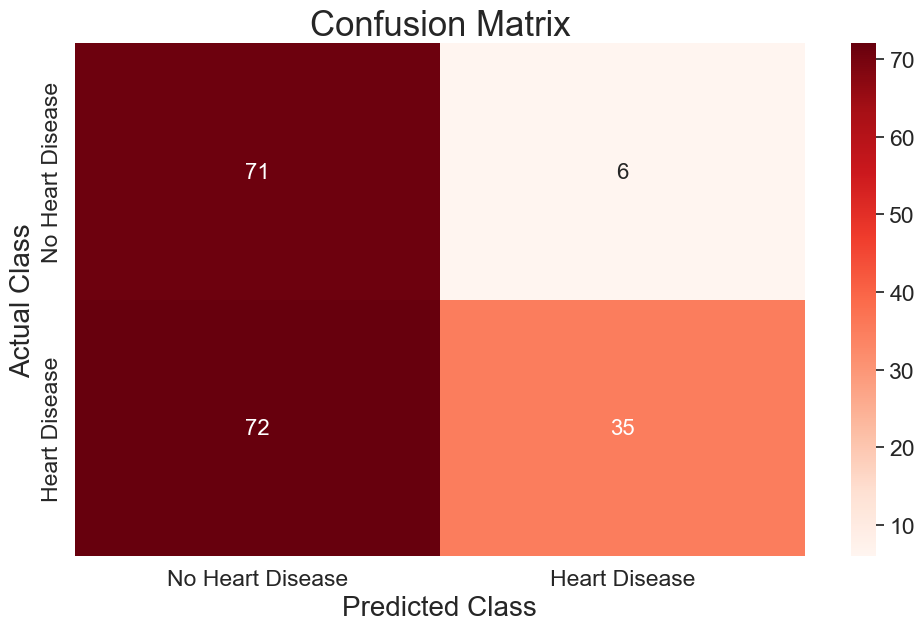

In [53]:
# Plot the confusion matrix
y_pred = nb_classifier.predict(X_test.toarray())
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 6))
sns.set(font_scale = 1.5)
sns.heatmap(cm, annot = True, annot_kws = {'size': 16}, cmap = 'Reds', fmt = 'd',
           xticklabels = ['No Heart Disease', 'Heart Disease'], yticklabels = ['No Heart Disease', 'Heart Disease'])
plt.tight_layout()
plt.title('Confusion Matrix', fontsize = 25)
plt.xlabel('Predicted Class', fontsize = 20)
plt.ylabel('Actual Class', fontsize = 20)
plt.show

As shown in our confusion matrix above, the upper left corner (represented by the dark red color) shows a value of 71, which indicates the number of instances in the test set that were correctly classified as not having heart disease.

The upper right corner (represented by the very light red color) shows a value of 6, which represents the number of instances in the test set that were incorrectly classified as not having heart disease when in fact they did have heart disease.

The lower left corner (represented by the maroon color) shows a value of 72, which indicates the number of instances in the test set that were incorrectly classified as having heart disease when in fact they did not have heart disease.

Finally, the lower right corner (represented by the orange color) shows a value of 35, which represents the number of instances in the test set that were correctly classified as having heart disease.

Overall, the confusion matrix provides valuable information about the performance of our model in correctly classifying instances in the test set as either having or not having heart disease.

## Explainable AI - XAI

Explainable AI or XAI, is a branch of AI that aims to make machine learning models more transparent and interpretable. The idea behind XAI is that the results of AI models should be able to be understood by humans, not just by the algorithms that created them.

In the context of this project, XAI could be useful to understand why the model is making the predictions that it is making, and to identify any biases or limitations in the data or the model. This can help you to build more trustworthy and reliable models.

In [35]:
print(type(X_train))

<class 'numpy.ndarray'>
